# Interpreting results

## Otsu & Isodata

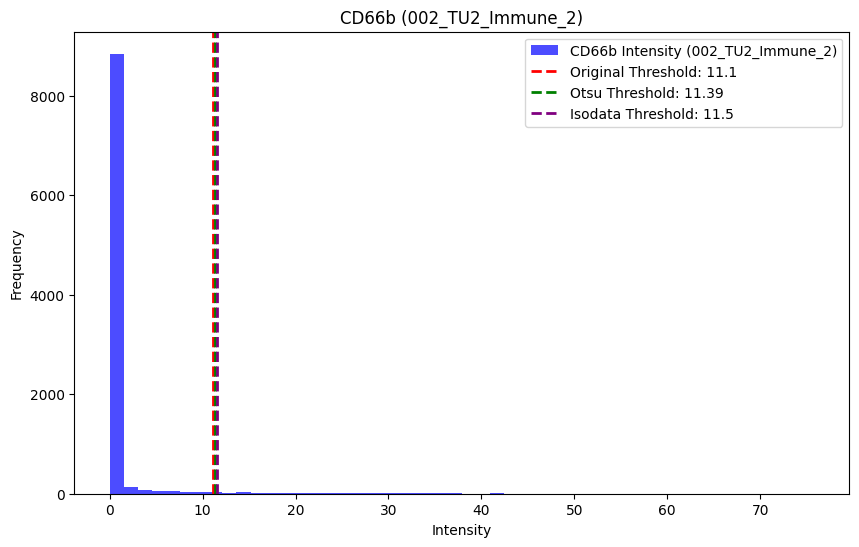

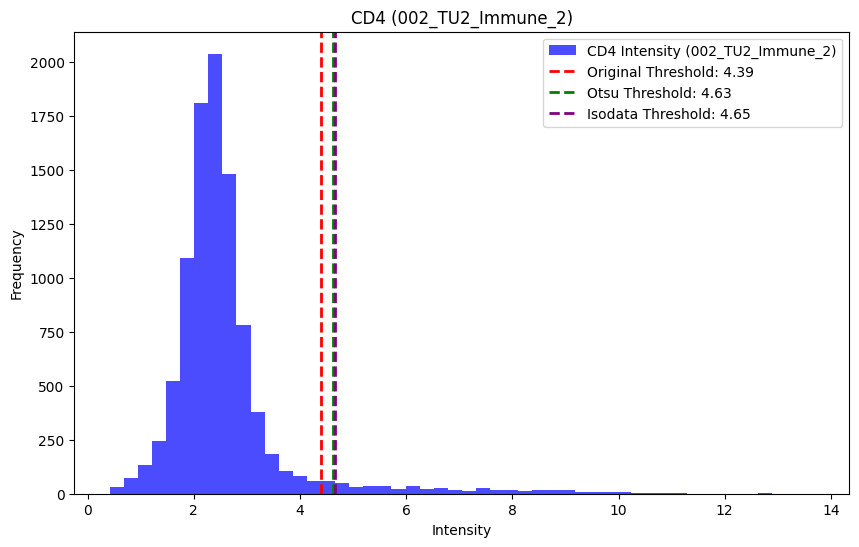

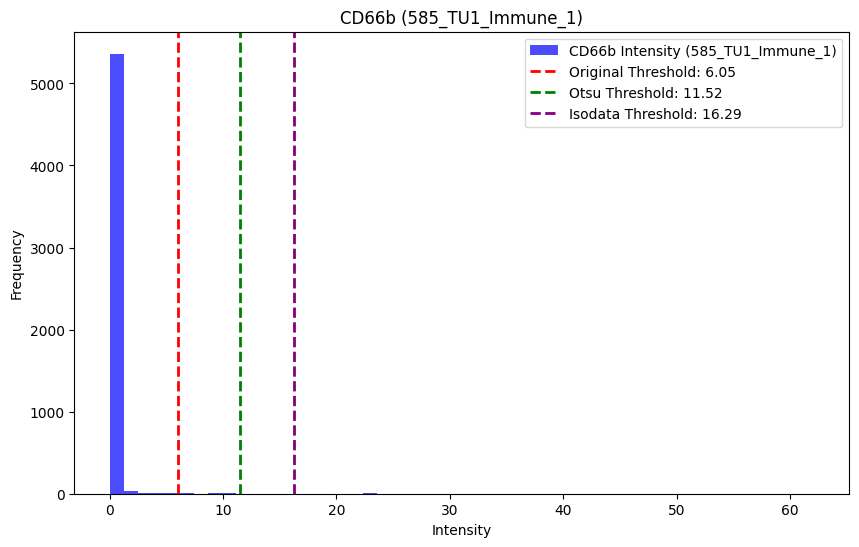

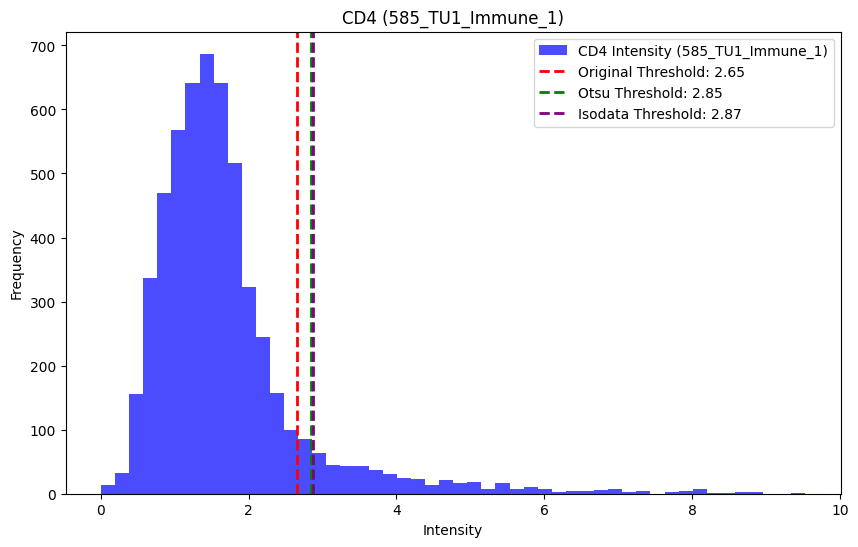

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


file1_path = '/content/002_TU2_Immune_2_NEW_thresholded_encoded.csv'
file2_path = '/content/CC_OC_585_TU1_Immune_1_NEW_thresholded_encoded.csv'


# Load the data
file1_data = pd.read_csv(file1_path)
file2_data = pd.read_csv(file2_path)


# Extract the relevant columns for CD66b and CD4 for both files
cd66b_file1 = file1_data['CD66b_asNumeric']
cd4_file1 = file1_data['CD4_asNumeric']
cd66b_file2 = file2_data['CD66b_asNumeric']
cd4_file2 = file2_data['CD4_asNumeric']


# Thresholds provided
thresholds_file1 = {'CD66b': {'original': 11.10, 'otsu': 11.39, 'isodata': 11.50},
                    'CD4': {'original': 4.39, 'otsu': 4.63, 'isodata': 4.65}}
thresholds_file2 = {'CD66b': {'original': 6.05, 'otsu': 11.52, 'isodata': 16.29},
                    'CD4': {'original': 2.65, 'otsu': 2.85, 'isodata': 2.87}}

# Plotting function for histograms with thresholds
def plot_histogram_with_thresholds(data, thresholds, marker_name, file_name):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=50, alpha=0.7, label=f'{marker_name} Intensity ({file_name})', color='blue')

    # Plot thresholds
    for threshold_type, threshold_value in thresholds.items():
        plt.axvline(threshold_value, color='red' if threshold_type == 'original' else 'green' if threshold_type == 'otsu' else 'purple',
                    linestyle='--', linewidth=2, label=f'{threshold_type.capitalize()} Threshold: {threshold_value}')

    plt.title(f'{marker_name} ({file_name})')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plotting for CD66b and CD4 for both files
plot_histogram_with_thresholds(cd66b_file1, thresholds_file1['CD66b'], 'CD66b', '002_TU2_Immune_2')
plot_histogram_with_thresholds(cd4_file1, thresholds_file1['CD4'], 'CD4', '002_TU2_Immune_2')

plot_histogram_with_thresholds(cd66b_file2, thresholds_file2['CD66b'], 'CD66b', '585_TU1_Immune_1')
plot_histogram_with_thresholds(cd4_file2, thresholds_file2['CD4'], 'CD4', '585_TU1_Immune_1')



## GMM

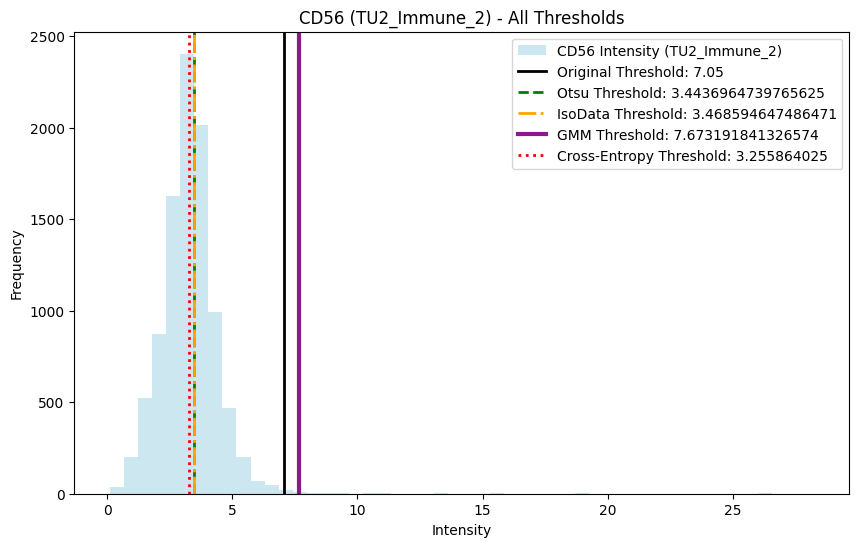

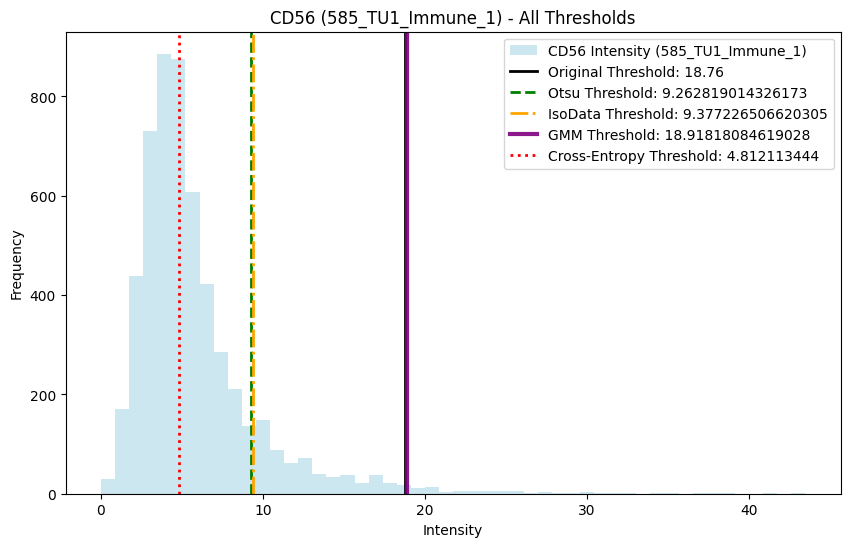

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data (You can replace these file paths with the actual paths in your environment)
file1_path = '/content/002_TU2_Immune_2_NEW_thresholded_encoded.csv'  # Corresponds to TU2_Immune_2
file2_path = '/content/CC_OC_585_TU1_Immune_1_NEW_thresholded_encoded.csv'  # Corresponds to 585_TU1_Immune_1

# Load the data
file1_data = pd.read_csv(file1_path)
file2_data = pd.read_csv(file2_path)

# Extract relevant column for CD56 for both files
cd56_file1 = file1_data['CD56_asNumeric']
cd56_file2 = file2_data['CD56_asNumeric']

# Thresholds provided for CD56 in both files, including original thresholds
thresholds_file1 = {
    'CD56': {'original': 7.05, 'otsu': 3.4436964739765625, 'isodata': 3.468594647486471, 'gmm': 7.673191841326574, 'cross_entropy': 3.255864025}
}

thresholds_file2 = {
    'CD56': {'original': 18.76, 'otsu': 9.262819014326173, 'isodata': 9.377226506620305, 'gmm': 18.91818084619028, 'cross_entropy': 4.812113444}
}

# Plotting function for histograms with thresholds
def plot_histogram_with_thresholds(data, thresholds, marker_name, file_name):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=50, alpha=0.6, label=f'{marker_name} Intensity ({file_name})', color='lightblue')

    # Plot thresholds with distinct styles
    plt.axvline(thresholds['original'], color='black', linestyle='-', linewidth=2, label=f'Original Threshold: {thresholds["original"]}')
    plt.axvline(thresholds['otsu'], color='green', linestyle='--', linewidth=2, label=f'Otsu Threshold: {thresholds["otsu"]}')
    plt.axvline(thresholds['isodata'], color='orange', linestyle='-.', linewidth=2, label=f'IsoData Threshold: {thresholds["isodata"]}')
    plt.axvline(thresholds['gmm'], color='purple', linestyle='-', linewidth=3, label=f'GMM Threshold: {thresholds["gmm"]}', alpha=0.9)
    plt.axvline(thresholds['cross_entropy'], color='red', linestyle=':', linewidth=2, label=f'Cross-Entropy Threshold: {thresholds["cross_entropy"]}')

    # Custom GMM visual emphasis
    plt.title(f'{marker_name} ({file_name}) - All Thresholds')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plotting histograms for CD56 for both files with all thresholding algorithms
plot_histogram_with_thresholds(cd56_file1, thresholds_file1['CD56'], 'CD56', 'TU2_Immune_2')
plot_histogram_with_thresholds(cd56_file2, thresholds_file2['CD56'], 'CD56', '585_TU1_Immune_1')


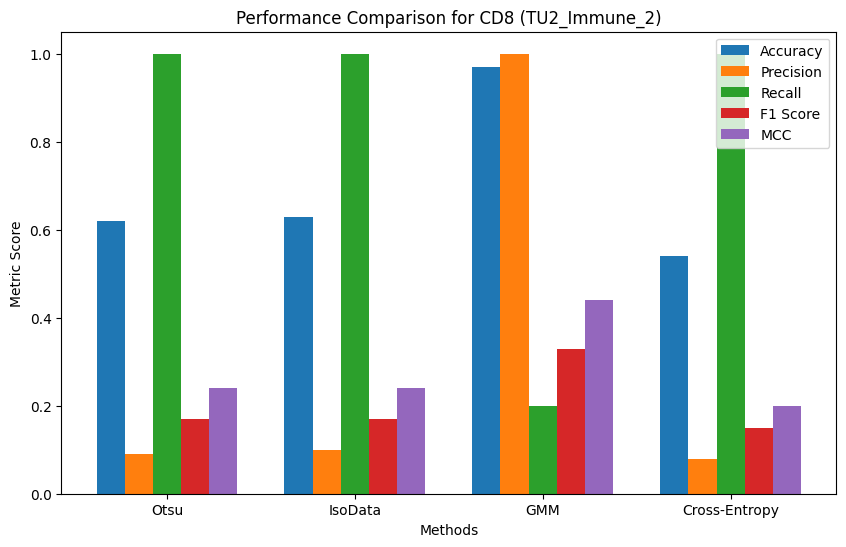

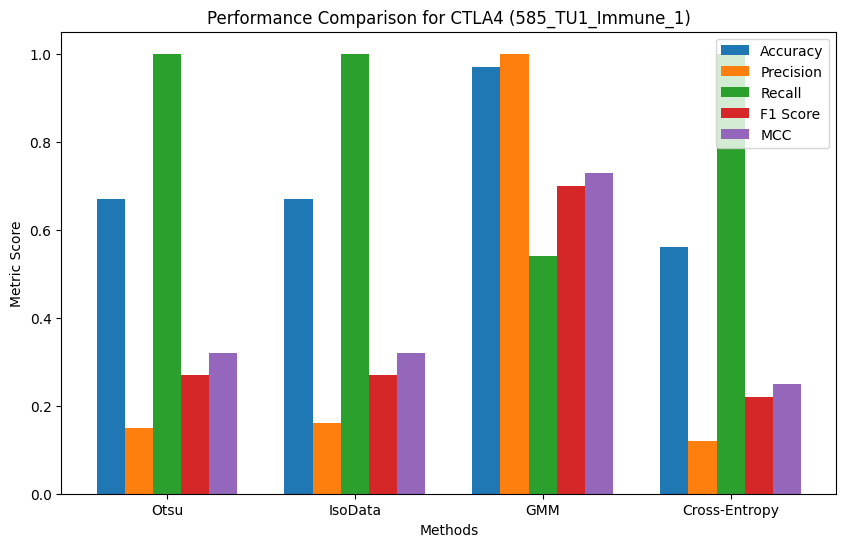

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Methods
methods = ['Otsu', 'IsoData', 'GMM', 'Cross-Entropy']

# Performance values for CD8 (File 1)
metrics_cd8_file1 = {
    'Accuracy': [0.62, 0.63, 0.97, 0.54],
    'Precision': [0.09, 0.10, 1.00, 0.08],
    'Recall': [1.00, 1.00, 0.20, 1.00],
    'F1 Score': [0.17, 0.17, 0.33, 0.15],
    'MCC': [0.24, 0.24, 0.44, 0.20]
}

# Performance values for CTLA4 (File 2)
metrics_ctla4_file2 = {
    'Accuracy': [0.67, 0.67, 0.97, 0.56],
    'Precision': [0.15, 0.16, 1.00, 0.12],
    'Recall': [1.00, 1.00, 0.54, 1.00],
    'F1 Score': [0.27, 0.27, 0.70, 0.22],
    'MCC': [0.32, 0.32, 0.73, 0.25]
}

# Plot function
def plot_performance_comparison(metrics, methods, marker_name, file_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(methods))
    bar_width = 0.15

    # Plot bars for each metric
    for i, (metric_name, values) in enumerate(metrics.items()):
        ax.bar(index + i * bar_width, values, bar_width, label=metric_name)

    ax.set_xlabel('Methods')
    ax.set_ylabel('Metric Score')
    ax.set_title(f'Performance Comparison for {marker_name} ({file_name})')
    ax.set_xticks(index + bar_width * 2)
    ax.set_xticklabels(methods)
    ax.legend()
    plt.show()

# Plot for CD8 (File 1)
plot_performance_comparison(metrics_cd8_file1, methods, 'CD8', 'TU2_Immune_2')

# Plot for CTLA4 (File 2)
plot_performance_comparison(metrics_ctla4_file2, methods, 'CTLA4', '585_TU1_Immune_1')


## CTLA-4

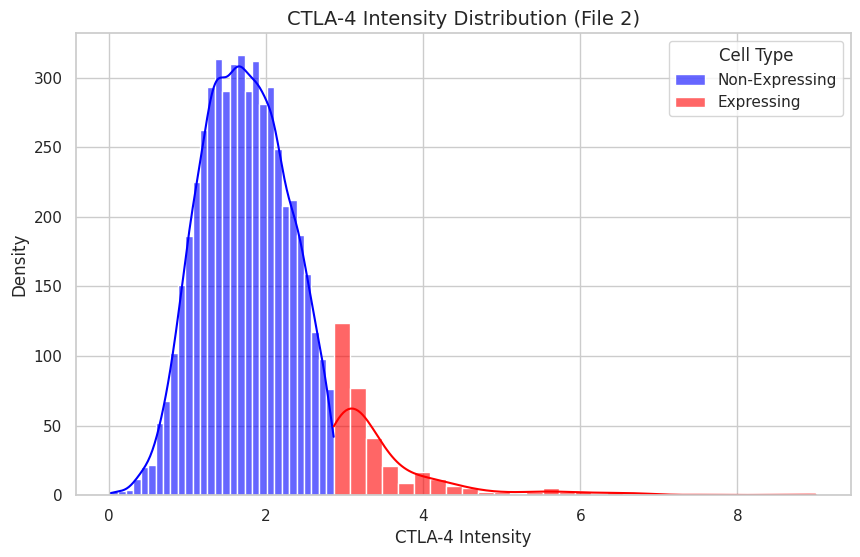

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Use the provided CTLA4 threshold for File 1
ctla4_threshold_file1 = 2.86

# Load the data (You can replace these file paths with the actual paths in your environment)
file1_path = '/content/002_TU2_Immune_2_NEW_thresholded_encoded.csv'  # Corresponds to TU2_Immune_2
file2_path = '/content/CC_OC_585_TU1_Immune_1_NEW_thresholded_encoded.csv'  # Corresponds to 585_TU1_Immune_1

# Load the data
#df_file1 = pd.read_csv(file1_path)
df_file1 = pd.read_csv(file2_path)


# Create True_Label column based on the threshold for CTLA4
df_file1['True_Label'] = (df_file1['CTLA4_asNumeric'] >= ctla4_threshold_file1).astype(int)

# Set the seaborn style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the distribution for non-expressing cells
sns.histplot(df_file1[df_file1['True_Label'] == 0]['CTLA4'], color='blue', label='Non-Expressing', kde=True, bins=30, alpha=0.6)

# Plot the distribution for expressing cells
sns.histplot(df_file1[df_file1['True_Label'] == 1]['CTLA4'], color='red', label='Expressing', kde=True, bins=30, alpha=0.6)

# Add labels and title
plt.title('CTLA-4 Intensity Distribution (File 2)', fontsize=14)
plt.xlabel('CTLA-4 Intensity', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add a legend to differentiate the two distributions
plt.legend(title='Cell Type')

# Show the plot
plt.show()
